<a href="https://colab.research.google.com/github/Priyanshu769-tech/WMS-project/blob/main/2020B1A72472H_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import random as rd

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from PIL import Image

#for the CNN model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train = pd.read_csv("sign_mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,6,155,157,156,156,156,157,156,158,158,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,2,187,188,188,187,187,186,187,188,187,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,2,211,211,212,212,211,210,211,210,210,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,13,164,167,170,172,176,179,180,184,185,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
test = pd.read_csv("sign_mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,5,126,128,131,132,133,134,135,135,136,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,10,85,88,92,96,105,123,135,143,147,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,0,203,205,207,206,207,209,210,209,210,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,3,188,191,193,195,199,201,202,203,203,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


In [ ]:
#creating our Y for the training data
Y_train = train["label"]

#creating our X for the training data
X_train = train.drop(labels = ["label"],axis = 1)

In [ ]:
#creating our Y for the test data
Y_test = test["label"]

#creating our X for the training data
X_test = test.drop(labels = ["label"],axis = 1)

In [ ]:
#converting the range of the pixel data from 0-255 to 0-1
X_train = X_train / 255.0

X_test = X_test / 255.0

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(X_test.shape)

(4490, 28, 28, 1)
(4488, 28, 28, 1)


In [ ]:
#creating an interactive bar graph that shows the distrubition of labels within the training set
fig = px.histogram(train,
                   x='label',
                   color = 'label',
                   title="Distrubition of Labels in the Training Set",
                   width=700, height=500)
fig.show()

In [ ]:
#creating an interactive bar graph that shows the distrubition of labels within the test set
fig = px.histogram(test,
                   x='label',
                   color = 'label',
                   title="Distrubition of Labels in the Test Set",
                   width=700, height=500)
fig.show()

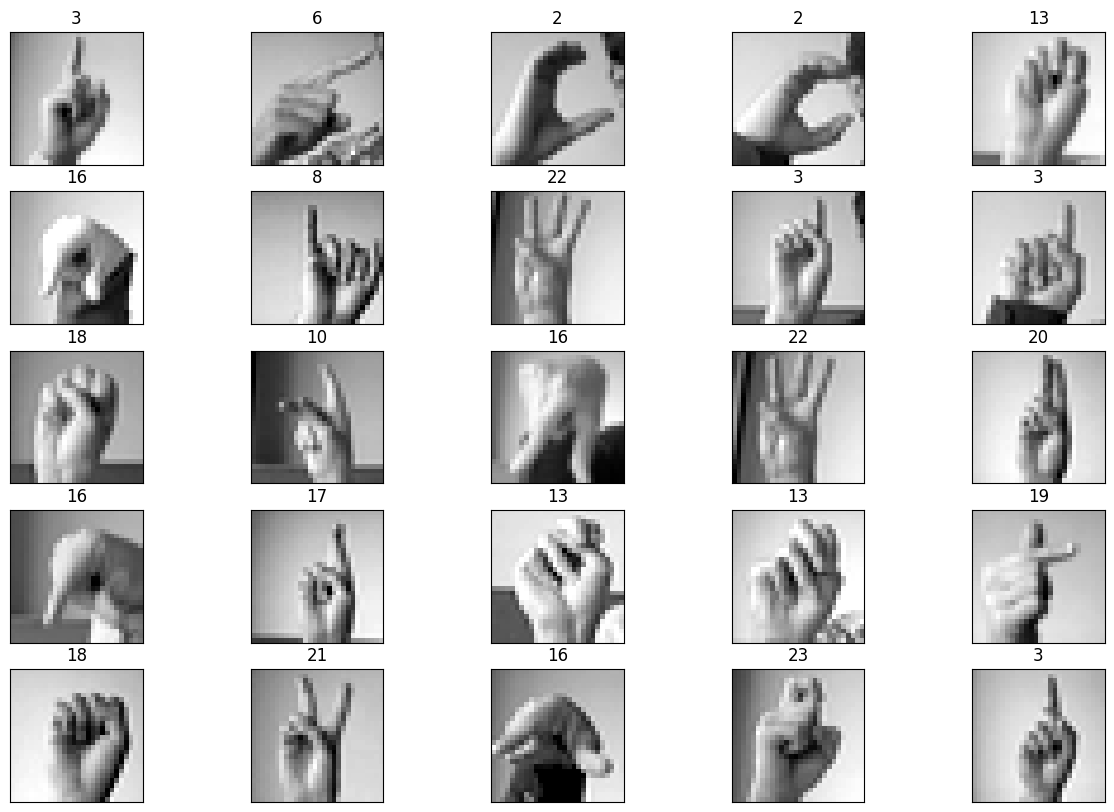

In [ ]:
#creating a 5x5 grid of the first 25 photos in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(Y_train[i])
plt.show()

In [ ]:
#spliting training images into the images we will use for training the model and validating the model
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=7)

In [ ]:
#creating our CNN model
model = keras.Sequential([

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),


    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),



    layers.Flatten(),

    layers.Dense(units=64, activation="relu"),
    layers.Dropout(.2),
    layers.Dense(units=26, activation="softmax"),
])

In [ ]:
#compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Training the model
history = model.fit(
    x = X_train,
    y = Y_train,
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=10,
    verbose=2,
)

Epoch 1/10
18/18 - 3s - loss: 0.6242 - accuracy: 0.8218 - val_loss: 2.2881 - val_accuracy: 0.7625 - 3s/epoch - 186ms/step
Epoch 2/10
18/18 - 3s - loss: 0.5256 - accuracy: 0.8477 - val_loss: 2.1007 - val_accuracy: 0.8282 - 3s/epoch - 140ms/step
Epoch 3/10
18/18 - 2s - loss: 0.4526 - accuracy: 0.8655 - val_loss: 1.8416 - val_accuracy: 0.8431 - 2s/epoch - 136ms/step
Epoch 4/10
18/18 - 2s - loss: 0.3745 - accuracy: 0.9050 - val_loss: 1.6027 - val_accuracy: 0.8717 - 2s/epoch - 134ms/step
Epoch 5/10
18/18 - 4s - loss: 0.3377 - accuracy: 0.9100 - val_loss: 1.3782 - val_accuracy: 0.9109 - 4s/epoch - 195ms/step
Epoch 6/10
18/18 - 3s - loss: 0.2785 - accuracy: 0.9218 - val_loss: 1.1528 - val_accuracy: 0.9088 - 3s/epoch - 163ms/step
Epoch 7/10
18/18 - 3s - loss: 0.2403 - accuracy: 0.9414 - val_loss: 0.9174 - val_accuracy: 0.9396 - 3s/epoch - 140ms/step
Epoch 8/10
18/18 - 2s - loss: 0.2158 - accuracy: 0.9405 - val_loss: 0.7377 - val_accuracy: 0.9449 - 2s/epoch - 128ms/step
Epoch 9/10
18/18 - 2s - 

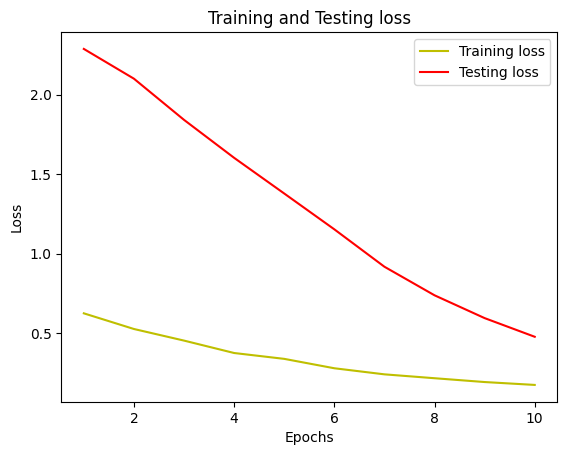

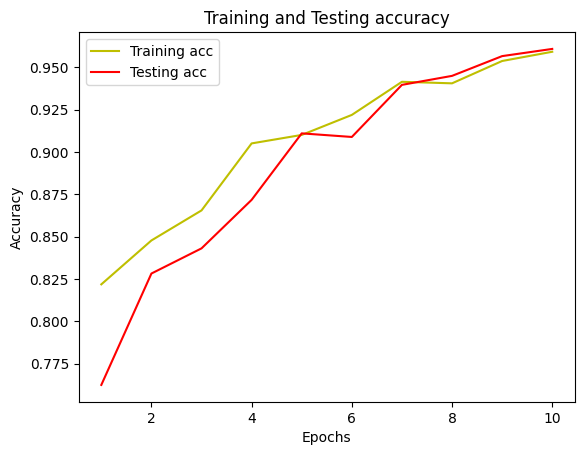

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Testing acc')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

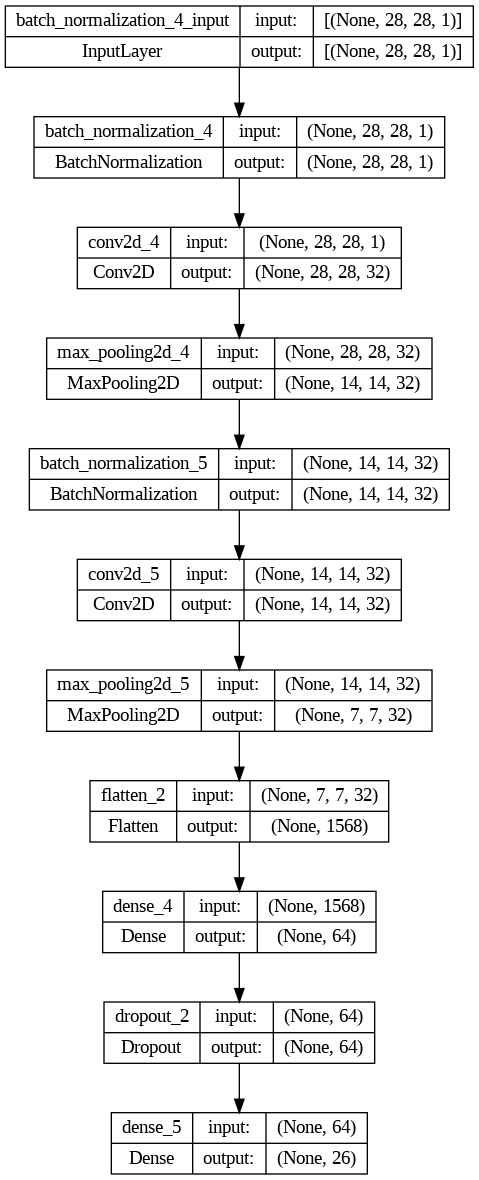

In [ ]:
# Generate a plot of the model
import pydot
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#creating our CNN model
model = keras.Sequential([

    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                  input_shape=[28, 28, 1]),
    layers.MaxPool2D(),


    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),



    layers.Flatten(),

    layers.Dense(units=64, activation="relu"),
     layers.Dropout(.3),
    layers.Dense(units=26, activation="softmax"),
])

In [ ]:
#compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Training the model
history = model.fit(
    x = X_train,
    y = Y_train,
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=10,
    verbose=2,
)

Epoch 1/10
18/18 - 3s - loss: 0.8055 - accuracy: 0.7677 - val_loss: 2.3742 - val_accuracy: 0.7084 - 3s/epoch - 157ms/step
Epoch 2/10
18/18 - 3s - loss: 0.7060 - accuracy: 0.7905 - val_loss: 2.1563 - val_accuracy: 0.7815 - 3s/epoch - 139ms/step
Epoch 3/10
18/18 - 2s - loss: 0.6178 - accuracy: 0.8214 - val_loss: 1.8912 - val_accuracy: 0.8346 - 2s/epoch - 132ms/step
Epoch 4/10
18/18 - 2s - loss: 0.5380 - accuracy: 0.8564 - val_loss: 1.6520 - val_accuracy: 0.8526 - 2s/epoch - 134ms/step
Epoch 5/10
18/18 - 4s - loss: 0.4852 - accuracy: 0.8623 - val_loss: 1.4095 - val_accuracy: 0.8759 - 4s/epoch - 211ms/step
Epoch 6/10
18/18 - 3s - loss: 0.3961 - accuracy: 0.8955 - val_loss: 1.1421 - val_accuracy: 0.9120 - 3s/epoch - 145ms/step
Epoch 7/10
18/18 - 2s - loss: 0.3618 - accuracy: 0.8982 - val_loss: 0.9706 - val_accuracy: 0.9130 - 2s/epoch - 137ms/step
Epoch 8/10
18/18 - 2s - loss: 0.3429 - accuracy: 0.9045 - val_loss: 0.7849 - val_accuracy: 0.9236 - 2s/epoch - 138ms/step
Epoch 9/10
18/18 - 2s - 

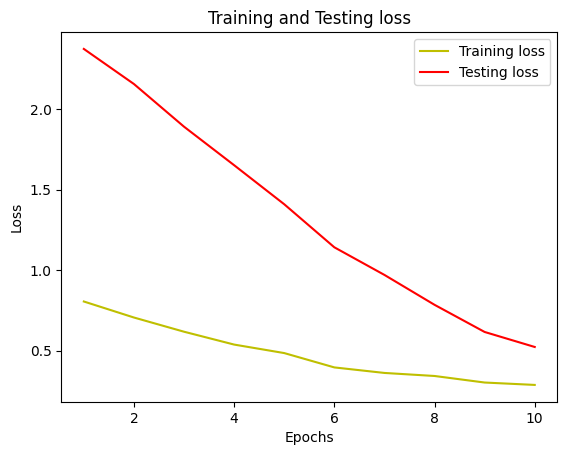

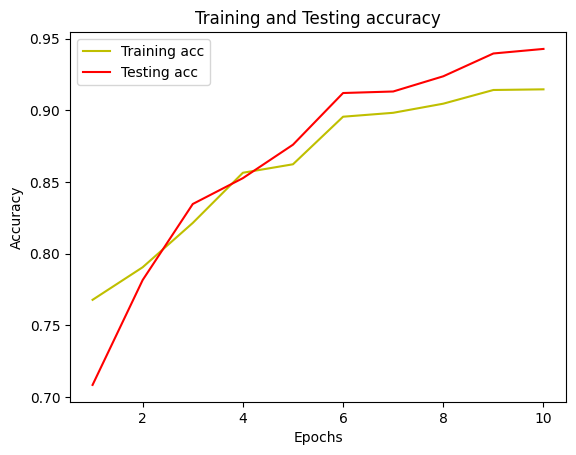

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Testing acc')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

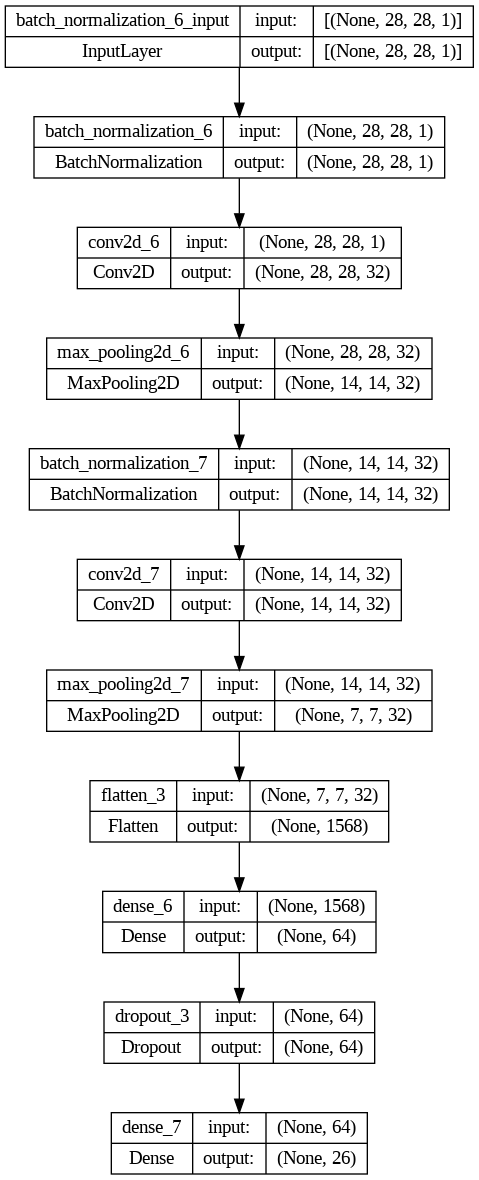

In [ ]:
# Generate a plot of the model
import pydot
import graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)